In [49]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage.interpolation import shift
from scipy.stats import t, shapiro, gaussian_kde
from scipy.optimize import minimize, fsolve
import pandas as pd
from scipy.stats import norm
import math

/var/folders/fw/6q32dx0x4lsc4ns_jfb1112m0000gn/T/ipykernel_14876/639291304.py:5: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


In [2]:
#Question 1

In [3]:
sigma = 0.5
price_prev = 50

# return
r = np.random.normal(0, sigma, 10000)

price_brownian = price_prev + r
price_arithmetic = price_prev * (1 + r)
price_log = price_prev * np.exp(r)

print(np.mean(price_brownian), np.std(price_brownian))
print(np.mean(price_arithmetic), np.std(price_arithmetic))
print(np.mean(np.log(price_log)), np.std(np.log(price_log)))

50.00095988636931 0.4970290227834332
50.04799431846559 24.851451139171658
3.9129828917974585 0.4970290227834332


/Users/pudong/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pudong/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pudong/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

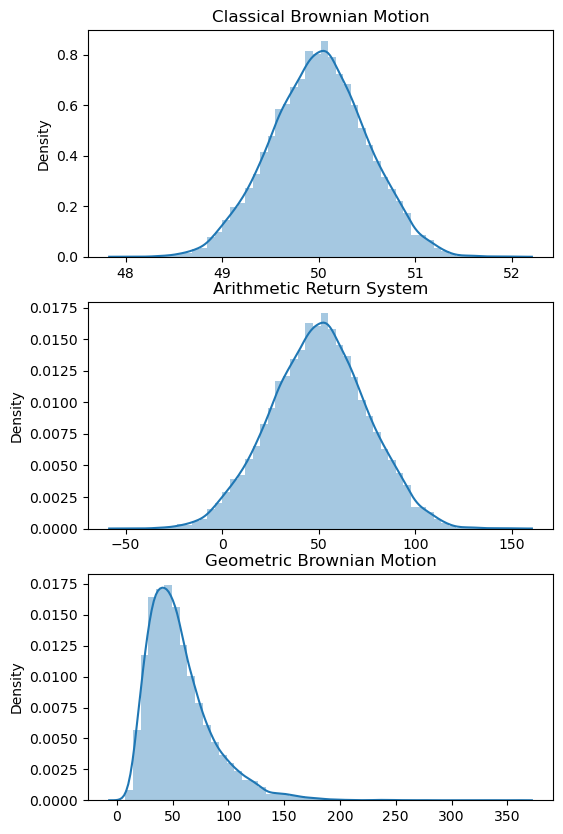

In [4]:
fig, axes = plt.subplots(3, 1, figsize=(6, 10))
sns.distplot(price_brownian, ax=axes[0])
sns.distplot(price_arithmetic, ax=axes[1])
sns.distplot(price_log, ax=axes[2])
axes[0].set_title("Classical Brownian Motion")
axes[1].set_title("Arithmetic Return System")
axes[2].set_title("Geometric Brownian Motion")
plt.show()

In [5]:
#Question 2

In [6]:
#Implement a function similar to the “return_calculate()” in this week’s code
def return_calculate(prices, method="arithmetic"):
    shifted_prices = prices[:-1]
    price_change_percent = []
    for i in range(len(shifted_prices)):
        price_change_percent.append(prices[i+1] / shifted_prices[i])
    price_change_percent = pd.DataFrame(price_change_percent)
    if method == "arithmetic":
        return price_change_percent - 1
    elif method == "log":
        return np.log(price_change_percent)

In [7]:
# Read data
daily_prices = np.genfromtxt('DailyPrices.csv', delimiter=',')
daily_prices = np.delete(daily_prices, 0, 0)
daily_prices = np.delete(daily_prices, 0, 1)
# Calculate return
daily_return = return_calculate(daily_prices)
# Remove the mean from the series so that the mean(INTC)=0
daily_return -= daily_return.mean()
daily_return

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.016251,0.023338,0.018706,0.010018,0.053757,0.009100,0.009403,0.015175,0.091347,0.006102,...,0.013489,-0.004152,0.004456,0.051421,0.001937,-0.013301,0.032537,0.026442,0.029295,0.012263
1,0.001245,-0.001203,-0.001004,0.011518,0.001507,0.009381,0.008869,-0.020165,0.000139,-0.001747,...,0.007438,-0.002499,0.005628,0.037956,0.007630,0.011219,0.002879,0.015504,-0.000665,-0.026958
2,-0.021237,-0.021083,-0.029119,-0.020450,-0.050476,-0.036633,-0.036584,-0.040761,-0.076056,-0.006660,...,-0.034268,0.005256,0.014881,-0.047911,-0.011518,0.003808,-0.031340,-0.031723,-0.032656,-0.029738
3,-0.006350,-0.009170,-0.009468,-0.011903,-0.021637,-0.015003,-0.012830,-0.007446,-0.035761,0.003979,...,0.000035,-0.000978,0.007067,-0.001360,-0.005579,-0.006967,-0.014157,-0.004304,-0.002953,0.014063
4,-0.010607,-0.017626,-0.000566,-0.014394,-0.040900,-0.003408,-0.007078,-0.019774,-0.011124,-0.002040,...,0.010176,0.007051,-0.009026,0.002320,-0.002810,-0.001698,0.007858,-0.037452,-0.001523,-0.014580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,-0.010505,0.024586,-0.023457,-0.082956,0.009549,-0.026361,-0.031820,-0.011850,-0.028518,-0.010749,...,-0.004013,-0.011321,-0.001413,-0.003600,0.036548,0.003108,0.001853,-0.008713,-0.005230,0.000642
244,-0.005987,-0.017743,-0.005952,-0.010344,0.025627,-0.016829,-0.015547,-0.002503,-0.000986,-0.000267,...,-0.013769,0.003875,0.000930,-0.008025,0.020348,0.020801,-0.041665,0.005308,-0.009059,-0.005570
245,0.013203,0.019431,0.042186,0.000674,0.010992,0.047177,0.045252,0.029899,0.050936,0.014713,...,0.000313,-0.016543,-0.008653,0.018621,-0.005253,-0.002667,0.003089,0.001654,0.009393,-0.004593
246,-0.010810,-0.017467,-0.002939,-0.018815,0.023230,-0.075717,-0.073332,-0.042725,0.000978,-0.014354,...,-0.007788,-0.004526,-0.001424,-0.018932,-0.006080,0.001793,-0.016009,0.004309,-0.014667,0.008389


In [8]:
#select data for META
META = daily_return.iloc[:,7]

In [9]:
#calculate VaR
def calculate_var(data, mean=0, alpha=0.05):
    return mean - np.quantile(data, alpha)

In [11]:
# VaR: normal distribution
sigma = np.std(META)
simulation_norm = np.random.normal(0, sigma, 10000)
var_norm = calculate_var(simulation_norm)
print(var_norm)

0.06444215236842395


In [21]:
# VaR: normal distribution with an Exponentially Weighted variance

# calculate exponential weights
def calculate_exponential_weights(lags, lamb):
    weights = []
    for i in range(1, lags + 1):
        weight = (1 - lamb) * lamb ** (i - 1)
        weights.append(weight)
    weights = np.array(weights)
    weights = np.flip(weights)
    normalized_weights = weights / weights.sum()
    return normalized_weights

# calculate exponentially weighted covariance matrix
def calculate_ewcov(data, lamb):
    weights = calculate_exponential_weights(data.shape[1], lamb)
    error_matrix = data - data.mean(axis=1)
    ewcov = error_matrix @ np.diag(weights) @ error_matrix.T
    return ewcov

In [30]:
ew_cov = calculate_ewcov(np.matrix(META), 0.94)
ew_variance = ew_cov[0, 0]
sigma = np.sqrt(ew_variance)
simulation_ew = np.random.normal(0, sigma, 10000)
var_ew = calculate_var(simulation_ew)
print(var_ew)

0.094140771906898


In [32]:
# VaR: MLE fitted T distribution.
result = t.fit(META, method="MLE")
df = result[0]
loc = result[1]
scale = result[2]

simulation_t = t(df, loc, scale).rvs(10000)
var_t = calculate_var(simulation_t)
print(var_t)

0.05722198493958679


In [42]:
# VAR: Using a fitted AR(1) model.
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(META, order=(1,0,0))
res = model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      7   No. Observations:                  248
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 447.619
Date:                Fri, 17 Feb 2023   AIC                           -889.238
Time:                        21:42:28   BIC                           -878.697
Sample:                             0   HQIC                          -884.995
                                - 248                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.766e-06      0.003     -0.001      0.999      -0.005       0.005
ar.L1          0.0072      0.081      0.089      0.929      -0.152       0.167
sigma2         0.0016   6.67e-05     23.739      0.0

In [50]:
sigma = math.sqrt(0.0016)
simulation_ar = np.random.normal(0, sigma, 1000)
var_ar = calculate_var(simulation_ar)
print(var_ar)

0.0630520826909188


In [33]:
# VaR: historic
var_hist = calculate_var(META)
print(var_hist)

0.0546200790823787


/Users/pudong/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pudong/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/pudong/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

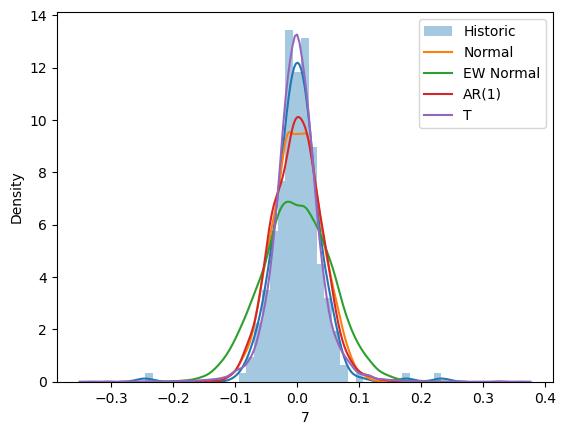

In [51]:
plt.figure()
sns.distplot(META, label='Historic')
sns.distplot(simulation_norm, hist=False, label='Normal')
sns.distplot(simulation_ew, hist=False, label='EW Normal')
sns.distplot(simulation_ar, hist=False, label='AR(1)')
sns.distplot(simulation_t, hist=False, label='T')
plt.legend()
plt.show()

In [ ]:
#Question 3

In [34]:
# rewrite the return calculation function for pandas
def pd_return_calculate(prices, method="arithmetic"):
    price_change_percent = (prices / prices.shift(1))[1:]
    if method == "arithmetic":
        return price_change_percent - 1
    elif method == "log":
        return np.log(price_change_percent)

In [35]:
# load in data and calculate returns
prices = pd.read_csv("DailyPrices.csv", parse_dates=[0], index_col=0)
portfolios = pd.read_csv("portfolio.csv")
returns = pd_return_calculate(prices)

# Combine the portfolios to get a total one and append it to the end for easier 
# calculation.
total_holdings = portfolios.groupby('Stock').sum('Holding')
total_holdings['Portfolio'] = 'Total'
total_holdings = total_holdings.reset_index()
portfolios = portfolios.append(total_holdings)

/var/folders/fw/6q32dx0x4lsc4ns_jfb1112m0000gn/T/ipykernel_14876/4113380193.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append(total_holdings)


In [36]:
#Method 1
def shapiro_test(data, alpha=0.05):
    test_stat, p = shapiro(data)
    if p > alpha:
        return 1
    else:
        return 0

# determine if the returns are normally distributed using Shapiro-Wilks test
for portfolio_index, portfolio in portfolios.groupby('Portfolio'):
    portfolio_returns = returns[portfolio.Stock]
    num_normal = portfolio_returns.apply(shapiro_test).sum()
    percentage_normal = num_normal / portfolio_returns.shape[1] * 100
    print(str(percentage_normal) + "%")

34.285714285714285%
21.875%
31.25%
29.292929292929294%


In [37]:
# Calculate historic VaR.
current_prices = pd.DataFrame({"Price":prices.iloc[-1]})

for portfolio_index, portfolio in portfolios.groupby('Portfolio'):
    portfolio = portfolio.set_index('Stock')
    portfolio = portfolio.join(current_prices.loc[portfolio.index])

    current_values = portfolio['Holding'] * portfolio['Price']
    portfolio_value = current_values.sum()

    sim_returns = returns[portfolio.index]
    sim_prices = (1 + sim_returns) * portfolio['Price'].T
    sim_values = sim_prices @ portfolio['Holding']

    historic_var = calculate_var(sim_values, portfolio_value)
    print(f"Portfolio {portfolio_index}: " + str(historic_var))

Portfolio A: 8740.470609052107
Portfolio B: 6903.910270434921
Portfolio C: 5467.113886933308
Portfolio Total: 20904.80322360387


In [38]:
#Method 2 KDE

In [39]:
# Calculate KDE VaR.
class KDE:
    def __init__(self, data, alpha=0.05):
        self.kde = gaussian_kde(data)
        self.alpha = alpha
        
    def quantile_kde(self, x):
        return self.kde.integrate_box(0, x) - self.alpha

    def calculate_var_kde(self, mean=0):
        return mean - fsolve(self.quantile_kde, x0=mean)[0]

for portfolio_index, portfolio in portfolios.groupby('Portfolio'):
    portfolio = portfolio.set_index('Stock')
    portfolio = portfolio.join(current_prices.loc[portfolio.index])

    current_values = portfolio['Holding'] * portfolio['Price']
    portfolio_value = current_values.sum()

    sim_returns = returns[portfolio.index]
    sim_prices = (1 + sim_returns) * portfolio['Price'].T
    sim_values = sim_prices @ portfolio['Holding']

    kde = KDE(sim_values)
    kde_var = kde.calculate_var_kde(portfolio_value)
    print(f"Portfolio {portfolio_index}: " + str(kde_var))

Portfolio A: 8514.201940137194
Portfolio B: 7194.656898739166
Portfolio C: 6012.2212601721985
Portfolio Total: 21582.070704863523
